In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Plotting individual Sin Waves with stimuli 
This is just from the sin Function _v2
Note this is also using tau of length 10800
    st = -120*30
    en = 120*60
    tp = np.arange(st,en)/120


In [16]:
with open('data/LDS_response_sinFunc_individual_v2.pickle', 'rb') as f:
    pickle_data = pickle.load(f)

#print(pickle)
print(pickle_data.keys())

tau = pickle_data['tau'] #this is the first key in the dictionary showing the time frame
data = pickle_data['051623WT_30m_RanNumv1']['data']#now data is the number of worms in an experiment 
stim = pickle_data['051623WT_30m_RanNumv1']['stim']#the second dict, 'stim' which is the stimulation'  


#for i in range(len(data[0])):
#    print(data[i]) # this is the activity for the first worm, separate trialsnoted as list of dictionary

#len(pickle['042523WT_30m_2.3mPeriod']['data'][0])
print(len(tau))
print(len(data))
print(len(stim))

dict_keys(['tau', '042523WT_30m_2.3mPeriod', '042523WT_30m_4.7mPeriod', '042523WT_30m_3.1mPeriod', '051623WT_30m_RanNumv1'])
10800
8
10800


# Individual Trials and Individual Worms

/home/sam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':


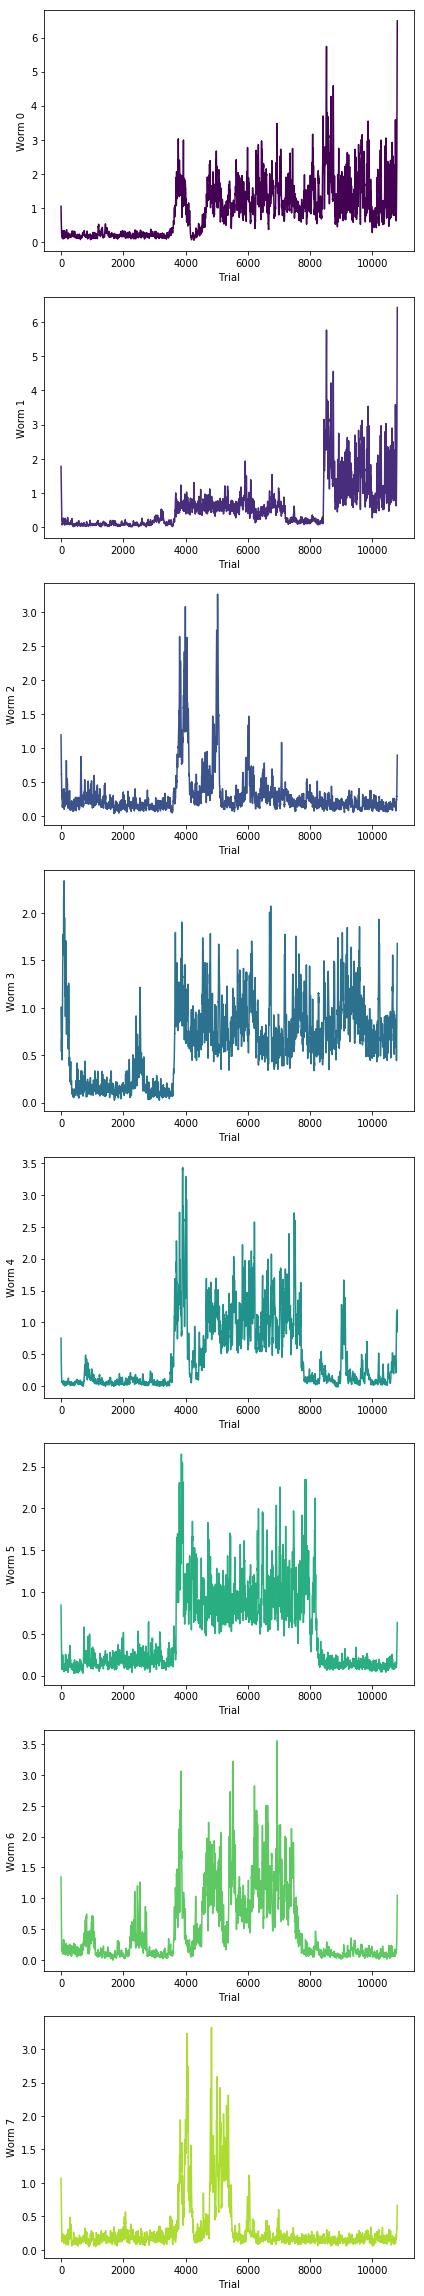

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define the trial range
trial_range = (0, 1)

response_range = []

# Iterate over the trials
for trial in range(trial_range[0], trial_range[1]):
    c = plt.cm.viridis(trial / 10)
    response_range.append(np.array([worm[trial] for worm in data if worm != 'tau']))

response_range = np.array(response_range).T

# Create a new figure and subplots for each worm
fig, axes = plt.subplots(nrows=response_range.shape[1], ncols=1, figsize=(6, 4*response_range.shape[1]))

# Plot each worm's response in a separate subplot
for i, ax in enumerate(axes):
    ax.plot(response_range[:, i], c=plt.cm.viridis(i/8))
    ax.set_ylabel('Worm {}'.format(i))
    ax.set_xlabel('Trial')

plt.tight_layout()

# Save the plot
plt.savefig('052323_plots/052323_051623WTstim_30m_RanNum1_indivtrial_indivworm.png')

plt.show()



In [28]:
# Save the plot
plt.savefig('052323_plots/052323_051623WTstim_30m_RanNum1_trial0_indworm.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
""" 
Plotting Individual Trials
"""

trial_range=(0,1)

response_range=[]

for trial in range(trial_range[0], trial_range[1]):
    c=plt.cm.viridis(trial/10)
    response_range.append(np.array([r_worm[trial] for r_worm in response]))

response_range=np.array(response_range).T

# for i in range(response_range.shape[1]):
#     plt.plot(response_range[:,i], c=plt.cm.viridis(i/8))     


# Create a new figure and subplots for each r_worm
fig, axes = plt.subplots(nrows=response_range.shape[1], ncols=1, figsize=(7, 4*response_range.shape[1]))

# Plot each r_worm in a separate subplot
for i, ax in enumerate(axes):
    ax.plot(response_range[:,i], c=plt.cm.viridis(i/8))
    ax.set_ylabel('r_worm[{}]'.format(i))
    ax.set_xlabel('Trial')

plt.tight_layout()
plt.show()


In [ ]:
# Create a new figure and plot the data and the stimulus
plt.figure()

# Plot data
# Assuming data is a 2D array, you might want to plot the mean of data (or any other aggregation)
data_mean = data.mean(axis=0)
plt.plot(tau, data_mean, label='Activity data')

# Plot stimulus
plt.plot(tau, stim, label='Stimulus', linestyle='--')

plt.xlabel('Time')
plt.legend()
plt.show()

# Random Sine Function

In [ ]:
# Make the stim value match the length of the other data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

with open('data/LDS_response_sinFunc_v2.pickle', 'rb') as f:
    pickle_data = pickle.load(f)

print(pickle_data.keys())


In [ ]:
#This is for making a random sine wave to test the function

# Extract data
tau = pickle_data['tau']
data = pickle_data['051623WT_30m_RanNum1Period']['data']
stim = pickle_data['051623WT_30m_RanNum1Period']['stim']

print(len(tau))

# Set the limits of the period in minutes
period_upper_limit = 6
period_lower_limit = 2

# Convert period limits into frequency limits
frequency_upper_limit = 1 / period_lower_limit  # cycles/minute
frequency_lower_limit = 1 / period_upper_limit  # cycles/minute

# Generate a list of random frequencies
random_frequencies = np.random.uniform(frequency_lower_limit, frequency_upper_limit, size=100)

# Initialize your stimulus array to be the same size as tau, filled with zeros
new_stim = np.zeros_like(tau)

# Determine the start and end indices for the stimulation
start_index = np.where(tau == 0)[0][0]
end_stimulus = np.where(tau == 30)[0][0]  # the index where tau is 30

# Generate sine waves with random frequencies, stopping after 30 minutes
for freq in random_frequencies:
    # Calculate the period of the sine wave with this frequency (in minutes)
    period = 1 / freq 
    
    # Convert period from minutes to number of steps
    period_steps = int(period * 60)
    
    # Calculate the end index for this frequency
    end_index = start_index + period_steps
    
    # Make sure we don't go past the end of the stimulus time
    if end_index > end_stimulus:
        end_index = end_stimulus
    
    # Generate the sine wave for this frequency
    new_stim[start_index:end_index] = np.sin(2 * np.pi * freq * (tau[start_index:end_index] - tau[start_index]))
    
    # Update start_index for the next frequency
    start_index = end_index
    
    # If we've reached the end of the stimulus time, break the loop
    if start_index >= end_stimulus:
        break

# Print part of the new stimuli
#print(new_stim[3600:4500])
print(len(new_stim))

In [ ]:
#This is for making a random sine wave to test the function

# Extract data
tau = pickle_data['tau']
data = pickle_data['051623WT_30m_RanNum1Period']['data']

# Given list of period durations in minutes made 051523
stim_list = [4.4, 3.6, 4.4, 3.6, 3.2, 5.0, 3.0, 4.3, 4.5, 2.5, 5.7, 2.8, 3.7, 3.0, 4.1, 5.1, 5.4, 3.8, 4.6, 4.7, 2.8, 2.6, 3.7, 5.3, 3.9, 3.2, 3.8, 3.6, 3.4, 5.9, 4.6, 4.9, 4.3, 2.3, 2.2, 3.0, 2.8, 2.9, 2.2, 3.5, 2.6, 5.1, 3.1, 4.0, 4.1, 4.7, 4.7, 4.9, 4.3, 3.1]
stim_frequencies = [1 / period for period in stim_list]

print(len(tau))

# Initialize your stimulus array to be the same size as tau, filled with zeros
new_stim = np.zeros_like(tau)

# Determine the start and end indices for the stimulation
start_index = np.where(tau == 0)[0][0]
end_stimulus = np.where(tau == 30)[0][0]  # the index where tau is 30

# Generate sine waves with random frequencies, stopping after 30 minutes
for freq in stim_frequencies:
    # Calculate the period of the sine wave with this frequency (in minutes)
    period = 1 / freq 
    
    # Convert period from minutes to number of steps
    period_steps = int(period * 60)
    
    # Calculate the end index for this frequency
    end_index = start_index + period_steps
    
    # Make sure we don't go past the end of the stimulus time
    if end_index > end_stimulus:
        end_index = end_stimulus
    
    # Generate the sine wave for this frequency
    #new_stim[start_index:end_index] = np.sin(2 * np.pi * freq * (tau[start_index:end_index] - tau[start_index]))
    new_stim[start_index:end_index] = np.sin(2 * np.pi * freq * (tau[start_index:end_index] - tau[start_index]))

    # Update start_index for the next frequency
    start_index = end_index
    
    # If we've reached the end of the stimulus time, break the loop
    if start_index >= end_stimulus:
        break

# Print part of the new stimuli
#print(new_stim[3600:4500])
print(len(new_stim))

In [ ]:
import numpy as np

# Extract data
tau = pickle_data['tau']
data = pickle_data['051623WT_30m_RanNum1Period']['data']

# Given list of period durations in minutes made 051523
stim_list = [4.4, 3.6, 4.4, 3.6, 3.2, 5.0, 3.0, 4.3, 4.5, 2.5, 5.7, 2.8, 3.7, 3.0, 4.1, 5.1, 5.4, 3.8, 4.6, 4.7, 2.8, 2.6, 3.7, 5.3, 3.9, 3.2, 3.8, 3.6, 3.4, 5.9, 4.6, 4.9, 4.3, 2.3, 2.2, 3.0, 2.8, 2.9, 2.2, 3.5, 2.6, 5.1, 3.1, 4.0, 4.1, 4.7, 4.7, 4.9, 4.3, 3.1]

print(len(tau))

# Initialize your stimulus array to be the same size as tau, filled with zeros
new_stim = np.zeros_like(tau)

# Determine the start and end indices for the stimulation
start_index = np.where(tau == 0)[0][0]
end_stimulus = np.where(tau == 30)[0][0]  # the index where tau is 30

# Generate sine waves with random frequencies, stopping after 30 minutes
for s in stim_list:
    # Calculate the period of the sine wave with this frequency (in minutes)
    period = s
    
    # Convert period from minutes to number of steps
    period_steps = int(period * 60)
    
    # Calculate the end index for this frequency
    end_index = start_index + period_steps
    
    # Make sure we don't go past the end of the stimulus time
    if end_index > end_stimulus:
        end_index = end_stimulus
    
    # Generate the sine wave for this frequency, shifted by +π/2 to start at maximum
    t_values = tau[start_index:end_index]
    freq = 1 / period
    new_stim[start_index:end_index] = 0.5 + 0.5 * np.sin(2 * np.pi * freq * (t_values - tau[start_index]) + np.pi / 2)

    # Update start_index for the next frequency
    start_index = end_index
    
    # If we've reached the end of the stimulus time, break the loop
    if start_index >= end_stimulus:
        break

# Print part of the new stimuli
#print(new_stim[3600:4500])
print(len(new_stim)) 



In [ ]:
import matplotlib.pyplot as plt

# Create a new figure with specified size (width=15, height=10)
plt.figure(figsize=(15, 10))

# Assuming data is a 2D array, you might want to plot the mean of data (or any other aggregation)
data_mean = data.mean(axis=0)
plt.plot(tau, data_mean, label='Activity data')

# Plot the new stimulus
plt.plot(tau, new_stim, label='Stimulus', linestyle='--')
plt.xlabel('Time')
plt.legend()

# Set x-axis limits
plt.xlim(-10, 60)

# Save the plot
plt.savefig('052323_plots/052323_051623WT_30m_RanNum1_plot.png')

# Display the plot
plt.show()


# Plotting Sin Data _SamVersion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
with open('data/LDS_response_sinFunc.pickle', 'rb') as f:
    pickle_original = pickle.load(f)

print(pickle_original.keys())
len(pickle_original['021723_30m_3.1mPeriod']['data'][0])
'022123_30m_3.2mPeriod', '022123_30m_2.6mPeriod', '022123_30m_3.3mPeriod', '041123WT_30m_4.2mPeriod', '041123WT_30m_3.7mPeriod', '040623spp1_30m_3mPeriod', '040623spp1_30m_2mPeriod', '040623spp1_30m_4mPeriod',  '041123WT_30m_2.9mPeriod', '041823WT_30m_3mPeriod', '042523WT_30m_2.3mPeriod', '042523WT_30m_3.1mPeriod', '042523WT_30m_4.7mPeriod']

In [ ]:
%matplotlib inline


#periods=[.5,1,2,3,4,5,6,8,9,10,11,12,13,15]
periods=[2.3]
#periods=[2,2.5,2.7,3,3.2,3.5,4,4.5,5,5.5]
#periods=[4]
#periods=[2.9]
#interest=['WT','pc2','ppp1','spp1','eye531','eye532',]
#interest=['WT','starve121d','pc2']
interest=['WT']
test=response_sin(interest,exclude=['small'],periods=periods,n_boot=1e1,derivative=120,visible=0,
                  t_samp=(-3,40),plot_indiv_trial=False,)


#fig,ax=response_sin(interest,exclude=['small'],periods=periods,
#                    n_boot=1e1,derivative=120,visible=0,t_samp=(-3,40),
#                   plot_indiv_trial=False,)
# ax[0,0].set_ylim(0,2)
# fig.show()

In [ ]:
test.keys()

In [ ]:
len(test['data'])

In [ ]:
len(test['stim'])

## Plot Traces

In [ ]:
from tools.results_sin import response_sin
%matplotlib inline
import matplotlib.pyplot as plt

#periods=[.5,1,2,3,4,5,6,8,9,10,11,12,13,15]
periods=[3.7]
#periods=[2,2.5,2.7,3,3.2,3.5,4,4.5,5,5.5]
#periods=[4]
#periods=[2.9]
#interest=['WT','pc2','ppp1','spp1','eye531','eye532',]
#interest=['WT','starve121d','pc2']
interest=['WT']

fig,ax=response_sin(interest,exclude=['small'],periods=periods,
                    n_boot=1e1,derivative=120,visible=0,t_samp=(-3,40),
                   plot_indiv_trial=False,)
# ax[0,0].set_ylim(0,2)
# fig.show()

In [ ]:
plt.rcParams['svg.fonttype']='none'
fig.savefig('plots/SinWaves/sinWaves_spp1_1to5mperiod.svg')

## Oscillation amplitudes bulk

In [ ]:
from tools.results_sin import response_sin_amp
%matplotlib inline
import matplotlib.pyplot as plt

n_boot=1e1
#periods=[.5,1,2,2.5,2.7,3,3.2,3.5,4,4.5,5,5.5]
periods=[4.7]
# periods=[1,3,5,10]
# periods=[2,3,4,5,7,9,10]
interest=['WT','ppp1','eye531','eye532']# 'tbh','ppp1',
interest = ['WT',]#'chat']
fig,ax=response_sin_amp(interest,exclude=['small'],periods=periods,n_boot=n_boot,
                        t_samp=(15,30))
# ax[1].set_xscale('log')
fig.show()

In [ ]:
plt.rcParams['svg.fonttype']='none'
fig.savefig('plots/SinWaves/sinWaves_WT_1to5m.svg')

## Oscillation amplitudes for bulk versus individual periods

In [ ]:
from tools.results_sin import response_sin_amp, response_sin_amp_individual
%matplotlib inline
import matplotlib.pyplot as plt

n_boot=1e1
#periods=[.5,1,2,2.5,2.7,3,3.2,3.5,4,4.5,5,6,8,9,10,11,12,13,15]
periods=[3.5]
# periods=[1,3,5,10]
# periods=[2,3,4,5,7,9,10]
interest=['WT','ppp1','eye531','eye532']# 'tbh','ppp1',
interest = ['WT',]#'chat']
fig,ax=response_sin_amp(interest,exclude=['small'],periods=periods,n_boot=n_boot,
                        t_samp=(15,30))
fig,ax=response_sin_amp_individual(interest,exclude=['small'],periods=periods,n_boot=n_boot,
                        t_samp=(15,30),fig=fig,ax=ax)
# ax[1].set_xscale('log')
fig.show()

## Compare early/late for many periods 

In [ ]:
from tools.results_sin import response_sin_amp, response_sin_amp_individual
import matplotlib.pyplot as plt
n_boot = 1e1
periods=[.5,1,2,2.5,2.7,3,3.2,3.5,4,4.5,5,6,8,9,10,11,12,13,15]
# periods=[3,5,10,]
# periods=[1,3,5,10]
periods=[1,2,2.5,3,3.5,4,5,]
interest=['WT','ppp1','eye531','eye532']# 'tbh','ppp1',
interest = ['WT',]#'chat']
phase_calculation='bootstrap_mean'
fig,ax=response_sin_amp_individual(interest,exclude=['small'],periods=periods,n_boot=n_boot,
                        t_samp=(0,10),phase_calculation=phase_calculation)
fig,ax=response_sin_amp_individual(interest,exclude=['small'],periods=periods,n_boot=n_boot,
                        t_samp=(20,30),fig=fig,ax=ax,phase_calculation=phase_calculation)

In [ ]:
plt.rcParams['svg.fonttype']='none'
fig.savefig('plots/SinWaves/sinWaves_earlygrey10andlatered_1to5period.svg')

## Compare many time ranges for one period

In [ ]:
from tools.results_sin import response_sin_amp, response_sin_amp_individual
import matplotlib.pyplot as plt
import numpy as np

n_boot = 1e2
periods=[5]
interest = ['WT',]
step=2
overlap=7

phase_calculation='bootstrap_var'
fig,ax=response_sin_amp_individual(interest,exclude=['small'],periods=periods,n_boot=n_boot,t_samp=(0,step+overlap),
                                   phase_calculation=phase_calculation)

t_rng = np.arange(step,30-overlap,step)
for i in range(t_rng.size-1):
    fig,ax=response_sin_amp_individual(interest,exclude=['small'],periods=periods,n_boot=n_boot,
                                       t_samp=(t_rng[i],t_rng[i+1]+overlap),fig=fig,ax=ax,position_offset=i+1,
                                       phase_calculation=phase_calculation)

In [ ]:
ax[1].set_xscale('linear')
plt.rcParams['svg.fonttype']='none'
fig.savefig('plots/SinWaves/sinWaves_5periodsweep.svg')

## Compare drive amplitudes

In [ ]:
from tools.results_sin import response_sin_amp_vDriveamp
%matplotlib inline
response_sin_amp_vDriveamp('WT',[],periods=[2,3,4],drive_amp=[32,64,128],
                           n_boot=1e1)

In [ ]:
import pickle
name = 'data/LDS_response_sinFunc.pickle'
with open(name,'rb') as f:
    result = pickle.load(f)
print(result.keys())

## Autocovariance

In [ ]:
from tools.results_sin import response_sin_autocov
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
tau = np.arange(1,10*120,2)
fig,ax=response_sin_autocov('eye532',[],periods=[3,5,10],n_boot=1e2,tau=tau,)

In [ ]:
plt.rcParams['svg.fonttype']='none'
fig.savefig('plots/SinWaves/sinWaves_autocovariance_eye532.png')

## Multiple drive freq

In [ ]:
from tools.results_sin import response_dualSin_amp
response_dualSin_amp(interest_list=['WT'],exclude=[],n_boot = 1e1)

## UV+VISIBLE

In [ ]:
from tools.results_sin import response_sin_visUV
'''Note:
    order for amp+the other variables: (uv,vis)
    for constant UV use period 0, amplitude 0 (in the uv slot)'''

fig,ax=response_sin_visUV('WT',phase_shift=[-0.5,],n_boot=3e1,amplitude=(127,127),period=(3,3))

In [ ]:
fig.savefig('plots/SinWaves/UVVis_SinWaves_UV3_Vis3_-0.5piPhase.png')

In [ ]:
from tools.results_sin import response_sin_amp_visUV
response_sin_amp_visUV('WT',phase_shift=[-.5,0,1],n_boot=3e1)